In [46]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

Данные для варианта 2

In [47]:
def gen_sequence(seq_len=1000):
    seq = [math.sin(i / 5) * math.sin(i / 10 + 0.5) +
           random.normalvariate(0, 0.04) for i in range(seq_len)]
    return np.array(seq)


def draw_sequence(seq):
    # seq = gen_sequence(100)
    plt.plot(range(len(seq)), seq)
    plt.show()

Формируем датасет

In [ ]:
def gen_data_from_sequence(sequence, input_len, output_len):
    X, y = [], []
    for i in range(len(sequence) - input_len - output_len):
        X.append(sequence[i:i + input_len])
        y.append(sequence[i + input_len:i + input_len + output_len])
    return np.array(X), np.array(y)

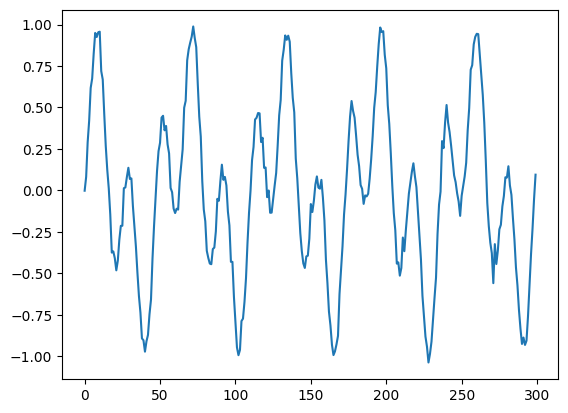

In [ ]:
sequence = gen_sequence(300)
input_len = 20
output_len = 20
X, y = gen_data_from_sequence(sequence, input_len, output_len)

draw_sequence(sequence)

Разделяем данные

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5)

Строим модель

In [ ]:

model = models.Sequential([
    layers.Input(shape=(input_len, 1)),
    layers.LSTM(64, return_sequences=True, activation='relu'),
    layers.LSTM(32, activation='relu'),
    layers.Dense(output_len)
])

Добавляем Callback для ранней остановки

In [53]:
early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=4, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/100


2024-12-23 02:40:59.682011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-23 02:41:00.160840: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_14.


6/6 [==============================] - ETA: 0s - loss: 0.2460 - mae: 0.3904

2024-12-23 02:41:16.041628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 19s 3s/step - loss: 0.2460 - mae: 0.3904 - val_loss: 0.2432 - val_mae: 0.3908
Epoch 2/100
6/6 [==============================] - 14s 2s/step - loss: 0.2440 - mae: 0.3889 - val_loss: 0.2413 - val_mae: 0.3893
Epoch 3/100
6/6 [==============================] - 14s 2s/step - loss: 0.2410 - mae: 0.3866 - val_loss: 0.2364 - val_mae: 0.3854
Epoch 4/100
6/6 [==============================] - 14s 2s/step - loss: 0.2344 - mae: 0.3817 - val_loss: 0.2232 - val_mae: 0.3744
Epoch 5/100
6/6 [==============================] - 13s 2s/step - loss: 0.2212 - mae: 0.3728 - val_loss: 0.2081 - val_mae: 0.3598
Epoch 6/100
6/6 [==============================] - 14s 2s/step - loss: 0.2089 - mae: 0.3616 - val_loss: 0.1954 - val_mae: 0.3508
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 0.1927 - mae: 0.3471 - val_loss: 0.1843 - val_mae: 0.3395
Epoch 8/100
6/6 [==============================] - 13s 2s/step - loss: 0.1850 - mae: 0.3383 - val_loss: 0.178

Оцениваем на тестовой выборке

In [ ]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test MAE: {test_mae}")

2/2 - 0s - loss: 0.0047 - mae: 0.0544 - 313ms/epoch - 156ms/step
Test MAE: 0.05436084046959877


Визулизируем предсказание

2/2 [==============================] - 0s 173ms/step


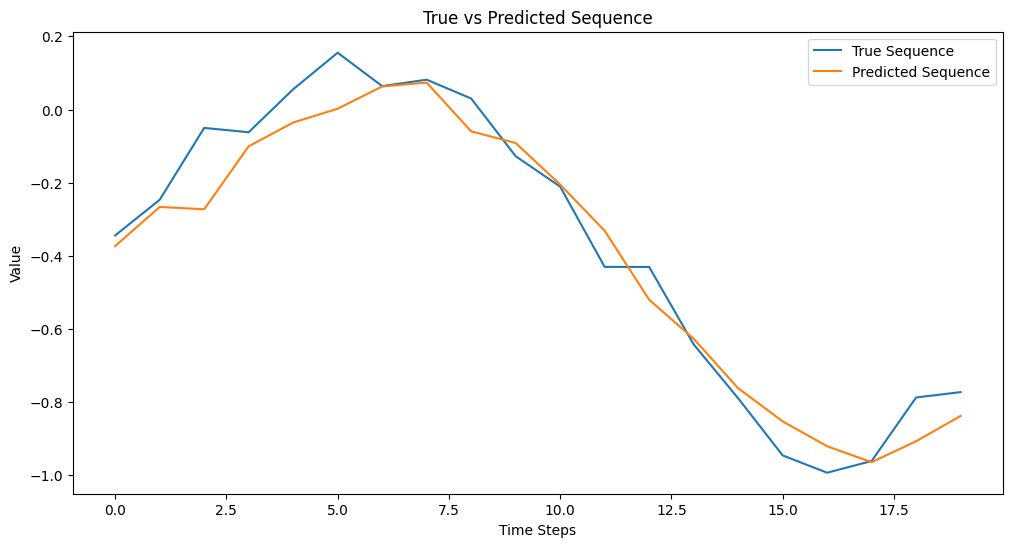

In [ ]:
predictions = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(range(output_len), y_test[0], label="True Sequence")
plt.plot(range(output_len), predictions[0], label="Predicted Sequence")
plt.title("True vs Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()